In [2]:
import numpy as np            # Numerical operations
import pandas as pd           # Data manipulation and analysis
import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns         # Enhanced data visualization

--------------------------------------------------------------------------------------------------------------------------------

# Importing Dataset

healthcare-dataset-stroke-data : [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

--------------------------------------------------------------------------------------------------------------------------------


In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
print("Stroke dataset memiliki {} baris dan {} column".format(*df.shape))

Stroke dataset memiliki 5110 baris dan 12 column


--------------------------------------------------------------------------------------------------------------------------------
# EDA 

Exploratory Data Analysis

--------------------------------------------------------------------------------------------------------------------------------


In [5]:
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1501,34386,Female,43.0,0,0,Yes,Private,Rural,102.50,50.2,never smoked,0
3216,6852,Female,52.0,1,0,Yes,Self-employed,Rural,104.45,NaN,never smoked,0
903,8008,Female,35.0,0,0,No,Govt_job,Urban,83.76,NaN,smokes,0
994,24174,Female,50.0,0,0,Yes,Govt_job,Rural,124.45,24.6,never smoked,0
26,38047,Female,65.0,0,0,Yes,Private,Rural,100.98,28.2,formerly smoked,1
736,41513,Female,20.0,0,0,Yes,Private,Urban,74.02,22.3,never smoked,0
2308,9197,Female,8.0,0,0,No,children,Urban,80.47,20.6,Unknown,0
229,69959,Female,80.0,1,0,No,Private,Urban,66.03,35.4,never smoked,1
4448,69010,Male,78.0,0,0,Yes,Private,Rural,83.20,21.2,formerly smoked,0
691,43196,Female,52.0,0,0,Yes,Self-employed,Urban,59.54,42.2,Unknown,0


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Numerical Column 
    ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi' 'stroke']
 
#### Categorical Column
    ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    
#### Unused Column
    ['id]


In [8]:
# Delete 'id' column

df.drop(['id'],
        axis=1,
        inplace = True)

In [9]:
df.sample(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3337,Female,41.0,0,0,Yes,Private,Urban,80.72,34.1,smokes,0
264,Male,35.0,0,0,No,Private,Rural,85.37,33.0,never smoked,0


'Id' column deleted

In [10]:
duplicates_rows = df.duplicated().sum()

print("Number of Duplicate Rows:", duplicates_rows)

Number of Duplicate Rows: 0


This dataset has no duplicate row(s)

--------------------------------------------------------------------------------------------------------------------------------
# Data Visualization

--------------------------------------------------------------------------------------------------------------------------------


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17964\1975994915.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


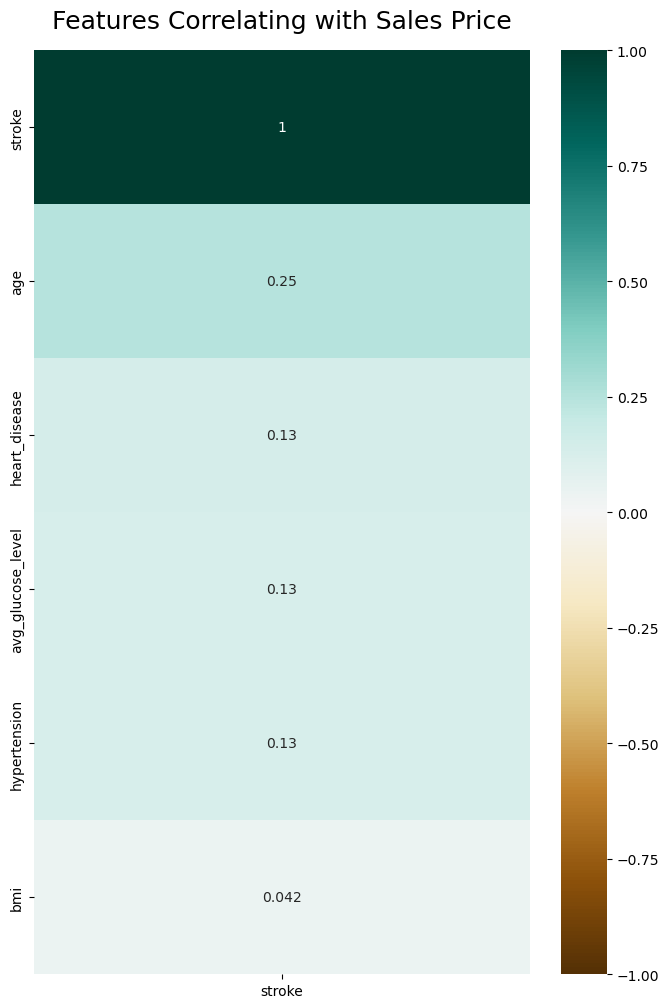

In [12]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

The visualization has not been able to display all the features because some are still object-type data

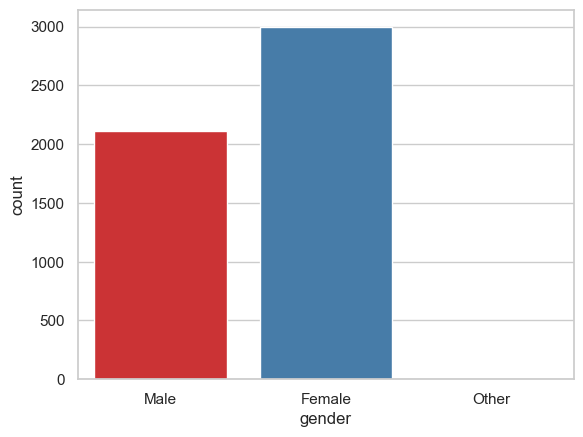

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [79]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="gender")
plt.show()
print(df['gender'].value_counts())

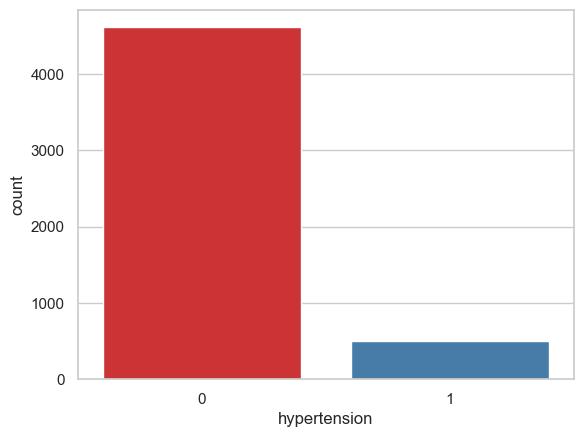

0    4612
1     498
Name: hypertension, dtype: int64


In [77]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="hypertension")
plt.show()
print(df['hypertension'].value_counts())

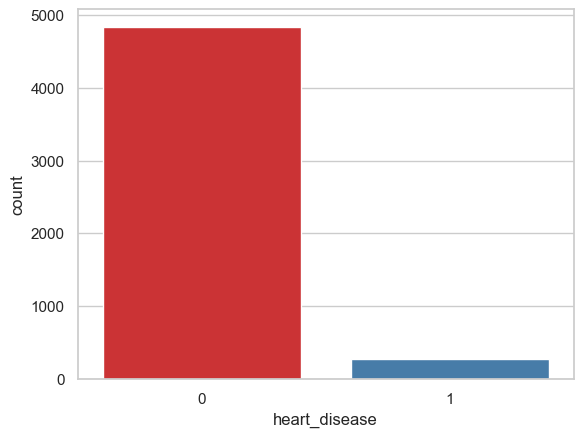

0    4834
1     276
Name: heart_disease, dtype: int64


In [92]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="heart_disease")
plt.show()
print(df['heart_disease'].value_counts())

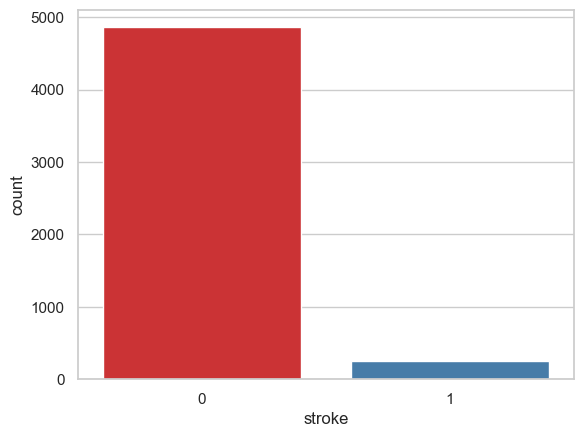

0    4861
1     249
Name: stroke, dtype: int64


In [93]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="stroke")
plt.show()
print(df['stroke'].value_counts())

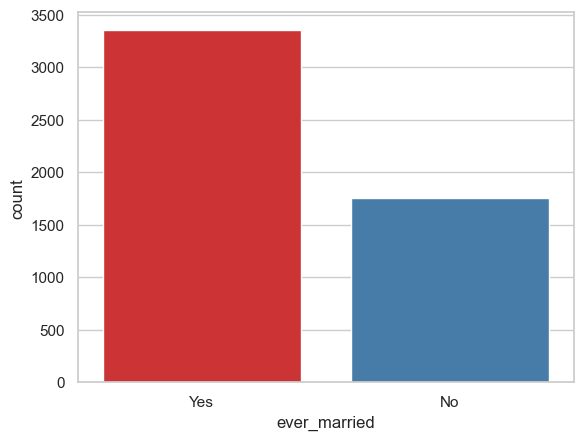

Yes    3353
No     1757
Name: ever_married, dtype: int64


In [94]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="ever_married")
plt.show()
print(df['ever_married'].value_counts())

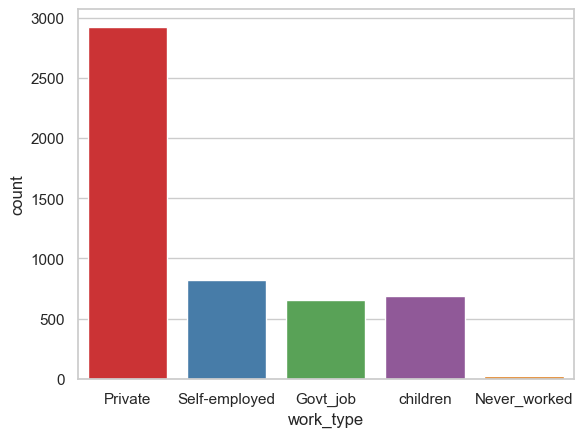

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [95]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="work_type")
plt.show()
print(df['work_type'].value_counts())

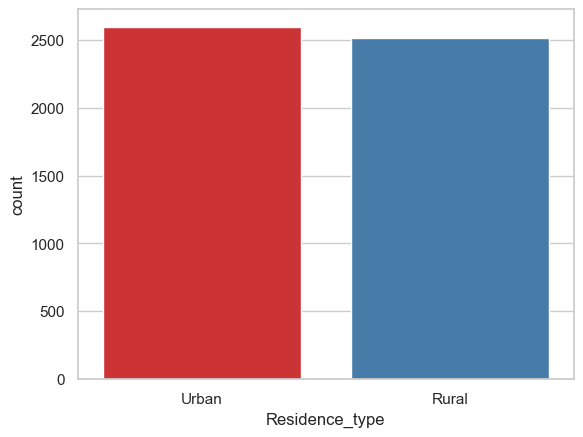

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


In [96]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="Residence_type")
plt.show()
print(df['Residence_type'].value_counts())

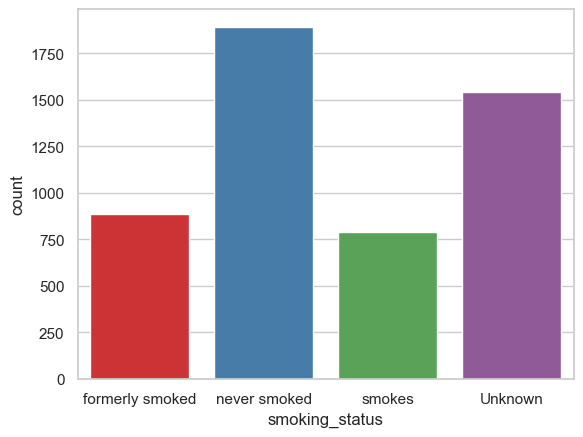

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [97]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="smoking_status")
plt.show()
print(df['smoking_status'].value_counts())